Import Libraries

In [29]:
import pandas as pd
import numpy as np


In [30]:
# Load Dataset
df = pd.read_csv("Titanic-Dataset.csv")  # change path if needed

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Basic Information About Data

In [31]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [32]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [33]:
# Check Missing Values
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

\We usually see missing values in:

Age

Cabin

Embarked

Now we decide whether to fill or remove them.

### Handling Missing Data

In [34]:
median_age = df["Age"].median() # find the median from the data ,Median is better than mean because age may have outliers.

In [35]:
df.loc[df["Age"].isnull(), "Age"] = median_age

In [36]:
df["Age"].isnull().sum()
# test missing value filled or not

np.int64(0)

Handle Cabin Column

Cabin often has too many missing values → many projects drop it.

In [37]:
df = df.drop(columns=["Cabin"])


Fill Missing Embarked with Mode

In [38]:
mode_embarked = df["Embarked"].mode()[0]
# most repeated value of embarked


In [39]:
df.loc[df["Embarked"].isnull(), "Embarked"] = mode_embarked

In [40]:
df.isnull().sum()
# check null again

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Handling Noisy Data / Outliers
🧠 Markdown Explanation

Sometimes values are unrealistic.

Example:

Very large Fare

Very high or very low Age

We can cap them or replace them.

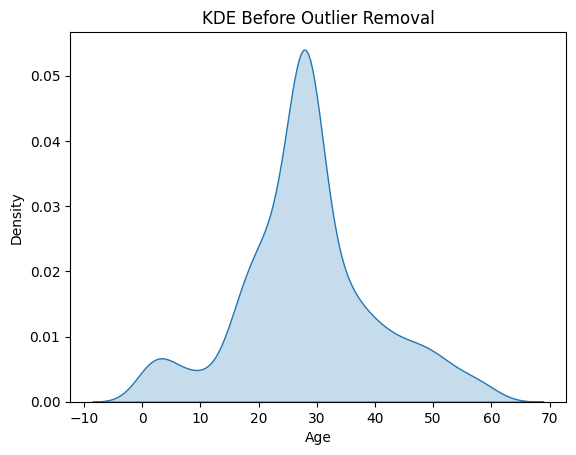

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(df["Age"].dropna(), fill=True)
plt.title("KDE Before Outlier Removal")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()


In [42]:
Q1 = df["Age"].quantile(0.25)
Q3 = df["Age"].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

print("Lower limit:", lower)
print("Upper limit:", upper)

outliers = df.loc[(df["Age"] < lower) | (df["Age"] > upper)]
outliers


Lower limit: 2.5
Upper limit: 54.5


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.00,0,0,113783,26.5500,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.00,0,0,248706,16.0000,S
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,Q
33,34,0,2,"Wheadon, Mr. Edward H",male,66.00,0,0,C.A. 24579,10.5000,S
...,...,...,...,...,...,...,...,...,...,...,...
827,828,1,2,"Mallet, Master. Andre",male,1.00,0,2,S.C./PARIS 2079,37.0042,C
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.00,0,0,113572,80.0000,S
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,S
851,852,0,3,"Svensson, Mr. Johan",male,74.00,0,0,347060,7.7750,S


In [49]:
df["Age"] = df["Age"].clip(upper=upper)


In [50]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


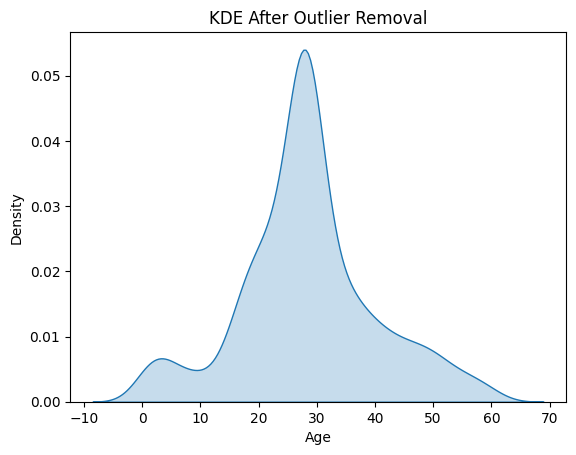

In [51]:
sns.kdeplot(df["Age"].dropna(), fill=True)
plt.title("KDE After Outlier Removal")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()


In [ ]:

df.loc[df["Age"] > 80, "Age"] = median_age

In [ ]:
# Handle Fare Outliers

In [47]:
df["Fare"].describe()


count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [48]:
Q1 = df["Fare"].quantile(0.25)
Q3 = df["Fare"].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

print("Upper limit:", upper)


Upper limit: 65.6344


In [ ]:
# Instead of deleting rich passengers, we limit the effect.
df["Fare"] = df["Fare"].clip(upper=upper)


What .clip() does

.clip(lower=a, upper=b) limits values to a given range.

Any value below lower → replaced with lower

Any value above upper → replaced with upper

Values inside the range → stay the same

In [ ]:
median_fare = df["Fare"].median()

df.loc[df["Fare"] > 300, "Fare"] = median_fare


### Remove Duplicate Rows

In [ ]:
df.duplicated().sum()


In [ ]:
df.isnull().sum()


In [ ]:
df.info()


In [ ]:
# Save Clean Dataset
df.to_csv("titanic_cleaned.csv", index=False)


What You Did

handled missing values

✔ used median/mode imputation

✔ removed irrelevant column

✔ treated noisy values

✔ removed duplicates

✔ saved cleaned dataset

Data cleaning was performed to improve dataset quality. Missing values in Age and Embarked were imputed using median and mode respectively. Cabin column was removed due to excessive null values. Outliers in Age and Fare were treated using conditional replacement. Duplicate entries were eliminated to prevent bias. The dataset is now ready for feature engineering and model training.